#### Machine Learning Avançado

#### Conteúdo - Bases e Notebook da aula

https://github.com/FIAP/Pos_Tech_DTAT/tree/Machine-Learning-Avan%C3%A7ado

#### Dicionário de Dados --> Aula 2

| Nome Original | Nome da Coluna (Sugerido) | Tipo de Dado | Descrição |
| :--- | :--- | :--- | :--- |
| **sl_no** | Nº de Série | Numérico (Inteiro) | Número de identificação sequencial único para cada candidato. |
| **gender** | Gênero | Categórico (Texto) | Gênero do candidato (ex: 'M' para Masculino, 'F' para Feminino). |
| **ssc_p** | Nota - Ensino Secundário | Numérico (Decimal) | Percentual de notas do candidato no Certificado de Escola Secundária (10º ano). |
| **ssc_b** | Conselho - Ensino Secundário | Categórico (Texto) | Conselho de educação em que o Ensino Secundário foi concluído (ex: 'Central', 'Others'). |
| **hsc_p** | Nota - Ensino Médio | Numérico (Decimal) | Percentual de notas do candidato no Certificado de Escola Secundária Superior (12º ano). |
| **hsc_b** | Conselho - Ensino Médio | Categórico (Texto) | Conselho de educação em que o Ensino Médio foi concluído. |
| **hsc_s** | Área - Ensino Médio | Categórico (Texto) | Área de estudo ou especialização no Ensino Médio (ex: 'Commerce', 'Science', 'Arts'). |
| **degree_p**| Nota - Graduação | Numérico (Decimal) | Percentual de notas do candidato na graduação. |
| **degree_t**| Área - Graduação | Categórico (Texto) | Área de estudo ou tipo de graduação (ex: 'Sci&Tech', 'Comm&Mgmt', 'Others'). |
| **workex** | Experiência de Trabalho | Categórico (Texto) | Indica se o candidato possui experiência de trabalho prévia ('Yes' ou 'No'). |
| **etest_p**| Nota - Teste de Empregabilidade | Numérico (Decimal) | Percentual de notas do candidato em um teste de empregabilidade. |
| **specialisation**| Especialização - MBA | Categórico (Texto) | Área de especialização do MBA (ex: 'Mkt&HR' para Marketing e RH, 'Mkt&Fin' para Marketing e Finanças). |
| **mba_p** | Nota - MBA | Numérico (Decimal) | Percentual de notas do candidato no MBA. |
| **status** | Status da Contratação | Categórico (Texto) | Status final do candidato no processo de recrutamento (ex: 'Placed' para contratado, 'Not Placed' para não contratado). |
| **salary** | Salário | Numérico (Decimal) | Salário oferecido ao candidato, caso tenha sido contratado ('Placed'). Pode conter valores nulos para os não contratados. |

#### Importação de pacotes, bibliotecas e funções (def)

In [62]:
# Importar biblioteca completa
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
import plotly_express as px

# Importar função especifica de um módulo
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [2]:
"""

Exemplo

-- Gerar o wcss
wcss = []

for k in range(1, 11):

  model = KMeans(n_clusters=k, n_init=10)
  model = model.fit(iris)
  wcss.append(model.inertia_)

df_wcss = pd.DataFrame({
    'Número de Clusters': range(1, 11),
    'WCSS': wcss
})

df_wcss.head(11)

-- Definir melhor numero de clusters
n = optimal_number_of_clusters(wcss)
print(n)

"""

# Apoio
# Como definir o número de clusters para o seu KMeans
# https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2

#### Aula 1 - Modelos de Classificação

In [3]:
# Usando a engine calamine devido a sua melhor performace se comparada com o openpyxl
link = "https://github.com/FIAP/Pos_Tech_DTAT/raw/073d3c7ab0cd105f8ad2fb347c0f02cb36773ee4/Aula%2001/Base%20de%20dados/gaf_esp.xlsx"
dados = pd.read_excel(link, engine= "calamine")

In [4]:
# Ver os primeiro dados 
dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [5]:
# Ver os ultimos dados 
dados.tail()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
95,Esperança,9.75,6.2
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0
99,Esperança,8.29,7.0


In [6]:
# Ver a estatistica descritiva da base 

dados.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


In [7]:
# Ver a qtd da base 

dados.shape

(100, 3)

In [8]:
# Agrupar os dados

dados.groupby("Espécie").describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

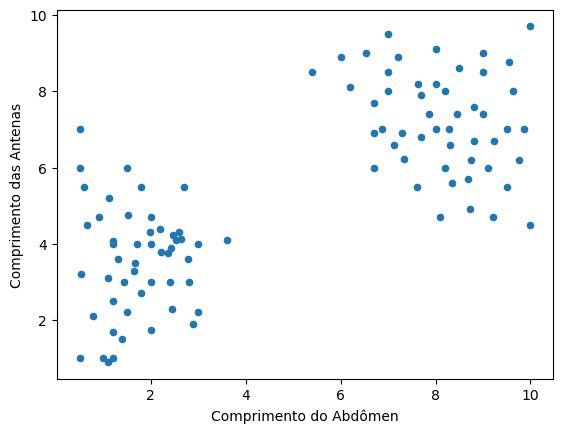

In [9]:
# Criar grafico de dispersão 

dados.plot.scatter(x = "Comprimento do Abdômen", y = "Comprimento das Antenas")
plt.show()

In [10]:
# Selecionar as variaveis caracteristica 

x = dados[["Comprimento do Abdômen","Comprimento das Antenas"]] # --> dois colchete pois estamos selecionando mais de uma coluna
x.head()

,Comprimento do Abdômen,Comprimento das Antenas
0,0.50,7.0
1,0.50,6.0
2,0.60,5.5
3,0.65,4.5
4,0.54,3.2


In [11]:
# Selecionar a variavel target

y = dados["Espécie"]
y.head()

0    Gafanhoto
1    Gafanhoto
2    Gafanhoto
3    Gafanhoto
4    Gafanhoto
Name: Espécie, dtype: object

In [12]:
# Separar os dados entre treino e teste 
# test_size    --> tamanho da base de teste  
# random_state --> é a semente da aleatoriedade 
# exemplo sem usar o stratify

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

qtd_gafanhoto = list(y_train).count("Gafanhoto")
qtd_esperanca = list(y_train).count("Esperança")
qtd = len(y_train)

print(f"Qtd de dados no y_train para Gafanhoto: {qtd_gafanhoto} --> {(qtd_gafanhoto/qtd) * 100:.2f} %")
print(f"Qtd de dados no y_train para Esperança: {qtd_esperanca} --> {(qtd_esperanca/qtd) * 100:.2f} %")

Qtd de dados no y_train para Gafanhoto: 38 --> 47.50 %
Qtd de dados no y_train para Esperança: 42 --> 52.50 %


In [13]:
"""

A Semente da Reprodutibilidade: Desvendando o `random_state=42` em Machine Learning

Ao se aventurar no universo do Machine Learning, é comum se deparar com o parâmetro `random_state` em diversas funções, sendo um dos exemplos mais clássicos o seu 
uso na divisão de dados de treino e teste com a função `train_test_split` da biblioteca Scikit-learn, frequentemente com o valor `42`. Mas, afinal, o que significa essa "semente de aleatoriedade" 
e por que ela é tão importante?

Em essência, a **semente de aleatoriedade (random seed)** é um ponto de partida para um gerador de números pseudoaleatórios. Computadores, por sua natureza determinística, não conseguem gerar 
números verdadeiramente aleatórios. Em vez disso, eles utilizam algoritmos para criar sequências de números que aparentam ser aleatórias. A semente é o valor inicial que alimenta esse algoritmo.

Isso significa que, ao fornecer a mesma semente para o gerador, ele produzirá sempre a mesma sequência de números "aleatórios". É aqui que reside a importância do `random_state` em 
Machine Learning: **garantir a reprodutibilidade dos resultados.**

### O Papel do `random_state` no `train_test_split`

A função `train_test_split` é fundamental para dividir um conjunto de dados em duas partes: uma para treinar o modelo e outra para testar sua performance em dados não vistos.
Essa divisão é feita de forma aleatória para garantir que ambos os conjuntos sejam representativos da totalidade dos dados.

Ao definir `random_state` com um valor inteiro, como `42`, estamos fixando a "aleatoriedade" dessa divisão. Em outras palavras, toda vez que o código for executado com `random_state=42`, a exata 
mesma separação entre dados de treino e teste será realizada. As mesmas linhas do seu conjunto de dados original serão alocadas para o conjunto de treino e as mesmas para o de teste, sempre.

Se o parâmetro `random_state` não for definido (ou for `None`), a cada execução a divisão dos dados será diferente, pois o sistema utilizará uma semente aleatória diferente, geralmente baseada no tempo do sistema.

### Por que a Reprodutibilidade é Crucial?

A capacidade de reproduzir experimentos é um pilar da ciência, e no Machine Learning não é diferente. A utilização do `random_state` oferece diversas vantagens:

* **Colaboração e Depuração:** Ao compartilhar seu código com outros pesquisadores ou colegas, o uso de uma semente de aleatoriedade garante que eles consigam replicar seus resultados exatamente. 
Isso facilita a depuração de problemas e a validação de suas conclusões.
* **Comparação Justa de Modelos:** Ao experimentar diferentes algoritmos ou ajustar os hiperparâmetros de um modelo, é essencial que a comparação seja feita nas mesmas condições. Fixar o `random_state` 
garante que a única variável sendo alterada é o próprio modelo, e não a forma como os dados foram divididos, permitindo uma avaliação justa e precisa do desempenho.
* **Consistência em Tutoriais e Publicações:** Em materiais educacionais e artigos científicos, o `random_state` é utilizado para que os leitores possam seguir os passos e obter os mesmos resultados apresentados, 
facilitando o aprendizado e a verificação.

### E por que o número 42?

A escolha do número `42` como valor para a semente de aleatoriedade é, na verdade, uma convenção e uma referência cultural popular na comunidade de tecnologia e ciência de dados. 
O número vem do livro de ficção científica "O Guia do Mochileiro das Galáxias", de Douglas Adams, onde `42` é a resposta para "a questão fundamental da vida, o universo e tudo mais".

Qualquer outro número inteiro poderia ser utilizado como semente (`0`, `123`, `2024`, etc.) e o efeito seria o mesmo: a garantia de reprodutibilidade. 
O uso do `42` é simplesmente um aceno divertido a essa obra icônica.

Em resumo, o `random_state=42` no `train_test_split` não é um parâmetro misterioso, mas sim uma ferramenta poderosa para assegurar que seus experimentos de Machine Learning sejam consistentes, 
verificáveis e comparáveis, trazendo mais rigor científico para o seu trabalho.

"""

# Separar os dados entre treino e teste 
# test_size    --> tamanho da base de teste  
# stratify     --> equilibrio na separação 
# random_state --> é a semente da aleatoriedade 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)

qtd_gafanhoto = list(y_train).count("Gafanhoto")
qtd_esperanca = list(y_train).count("Esperança")
qtd = len(y_train)

print(f"Qtd de dados no y_train para Gafanhoto: {qtd_gafanhoto} --> {(qtd_gafanhoto/qtd) * 100:.2f} %")
print(f"Qtd de dados no y_train para Esperança: {qtd_esperanca} --> {(qtd_esperanca/qtd) * 100:.2f} %")


Qtd de dados no y_train para Gafanhoto: 40 --> 50.00 %
Qtd de dados no y_train para Esperança: 40 --> 50.00 %


In [14]:
# Exemplo de numeros aleatorios com semente
np.random.seed(42)
np.random.randint(low=1,high=10,size=10)

array([7, 4, 8, 5, 7, 3, 7, 8, 5, 4])

In [15]:
# Exemplo de numeros aleatorios sem semente
np.random.randint(low=1,high=10,size=10)

array([8, 8, 3, 6, 5, 2, 8, 6, 2, 5])

In [16]:
# Criar o modelo KNN --> -Nearest Neighbors, ou K Vizinhos Mais Próximos
modelo_classificador = KNeighborsClassifier(n_neighbors=3) # --> n_neighbors é um hiperparemetro

In [17]:
# Treinar (fit) o modelo
modelo_classificador.fit(x_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
# Realizar as previsões
# modelo_classificador.predict([[8,6]]) --> Essa forma gera um warnings

# Dessa forma não gera o warnings
modelo_classificador.predict(pd.DataFrame([[8,6]], columns=["Comprimento do Abdômen", "Comprimento das Antenas"]))

array(['Esperança'], dtype=object)

In [19]:
# Verificar a acuracidade
y_predito = modelo_classificador.predict(x_test)

In [20]:
# Verificar a acuracidade
accuracy_score(y_true=y_test, y_pred=y_predito)

1.0

#### Aula 2 - KNN, SVM

In [21]:
# Usando a engine calamine devido a sua melhor performace se comparada com o openpyxl
link = "https://github.com/FIAP/Pos_Tech_DTAT/raw/073d3c7ab0cd105f8ad2fb347c0f02cb36773ee4/Aula%2002/Base%20de%20Dados/Recrutamento.xlsx"
dados = pd.read_excel(link, engine= "calamine")

In [22]:
# Consultar os dados
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [23]:
# Campo/Coluna Status é o nosso target 
# Ver o conteudo de uma coluna 
set(dados.status)

{'No', 'Yes'}

In [24]:
# Ver o estatistica basica/descritiva 
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [25]:
# Ver os tipos dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [26]:
# Outra maneira de ver os dados
dados.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

<Axes: >

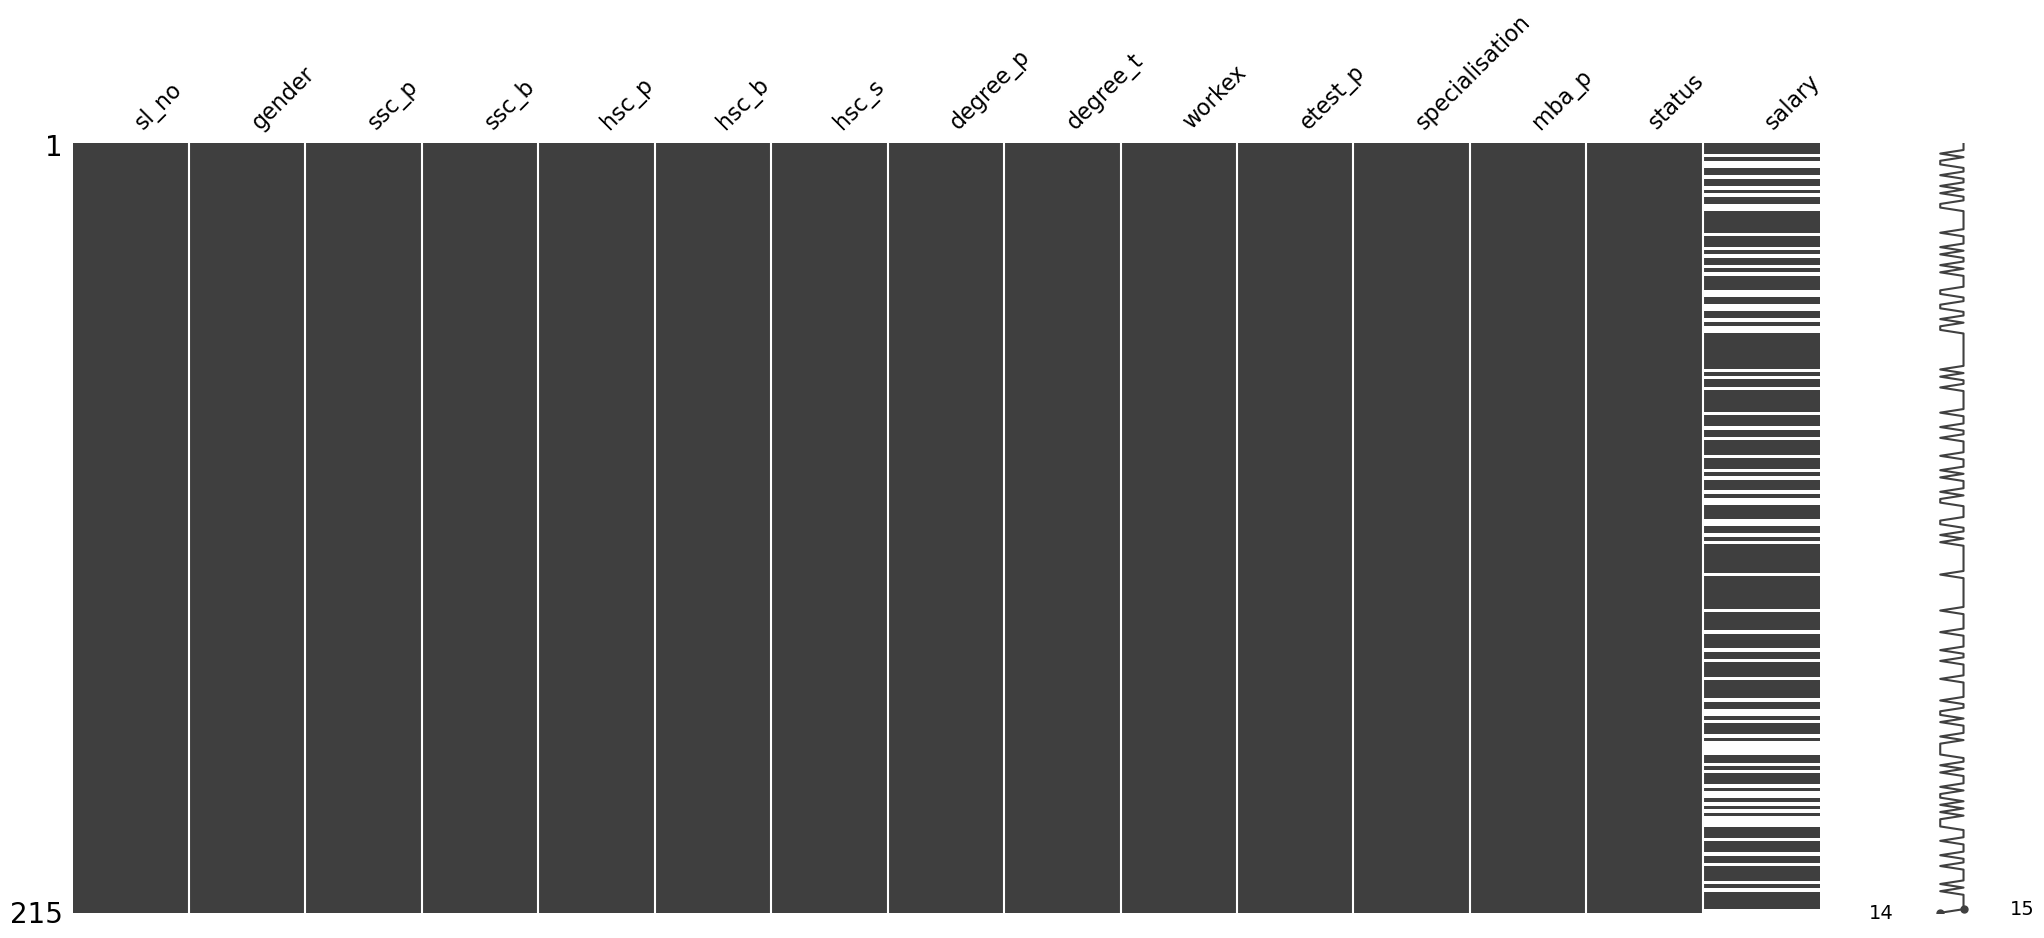

In [27]:
# Ver de forma visual dados faltantes

msno.matrix(dados)

In [28]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

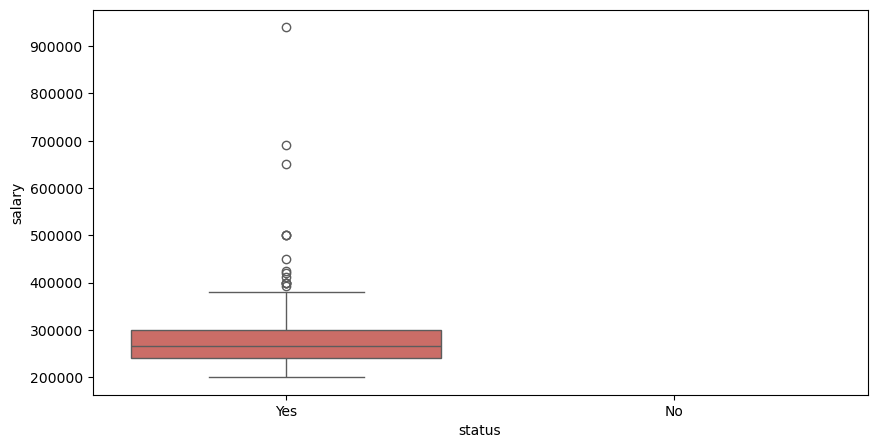

In [29]:
# Plotar um grafico do tipo box plot 

plt.figure(figsize=(10,5))
sns.boxplot(x="status", y="salary", data = dados, palette="hls", hue = "status")
plt.show()

In [30]:
# Tratar dados nulos 

dados["salary"] = dados["salary"].fillna(value=0) # --> Preencher com 0 onde esta vazio 

In [31]:
dados.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

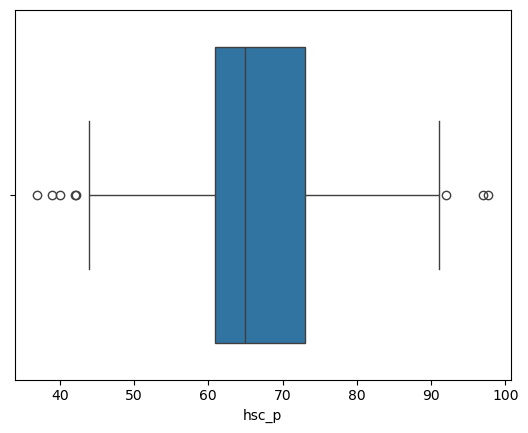

In [32]:
sns.boxplot(x=dados["hsc_p"]) # --> Boxplot no horizontal 
plt.show()

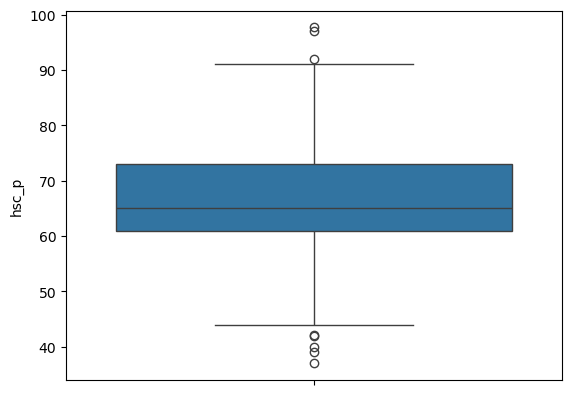

In [33]:
sns.boxplot(y=dados["hsc_p"]) # --> Boxplot no vertical
plt.show()

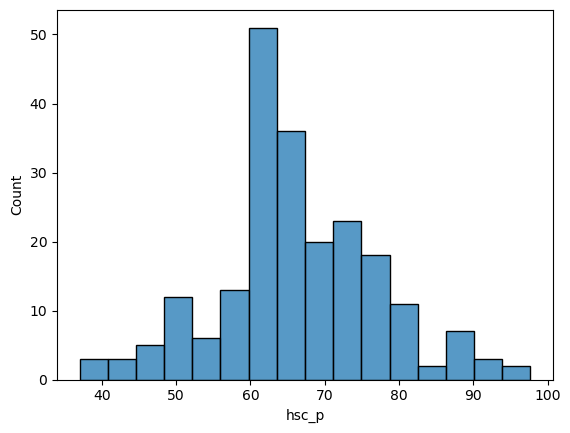

In [34]:
# Plotar o histograma

sns.histplot(data = dados, x="hsc_p")
plt.show()

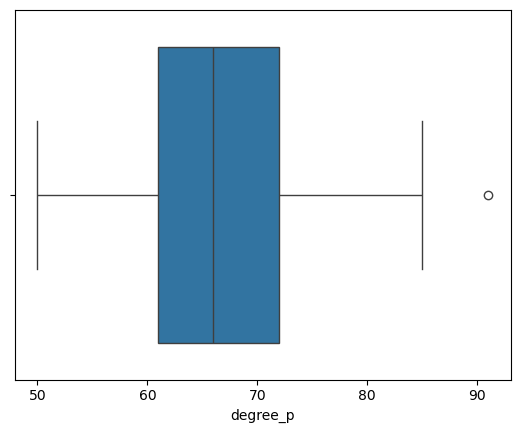

In [35]:
sns.boxplot(x=dados["degree_p"])
plt.show()

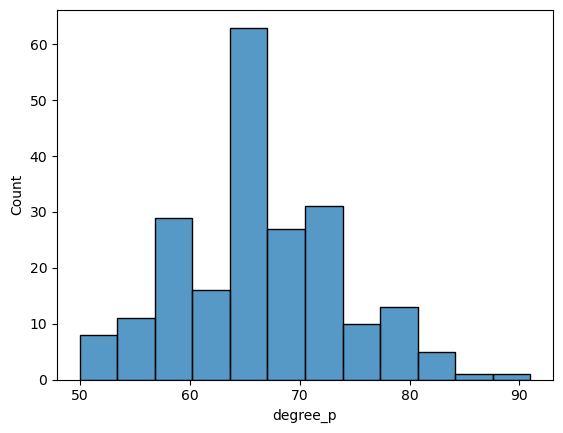

In [36]:
sns.histplot(data = dados, x="degree_p")
plt.show()

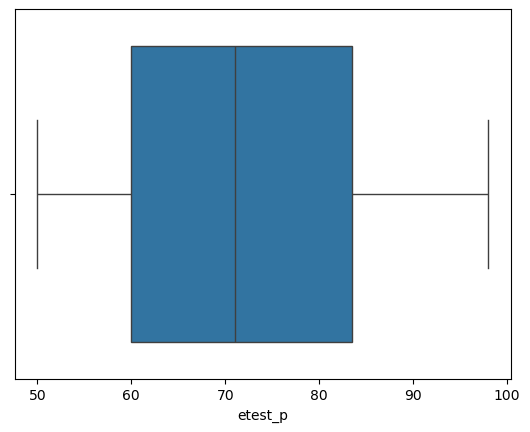

In [37]:
sns.boxplot(x=dados["etest_p"])
plt.show()

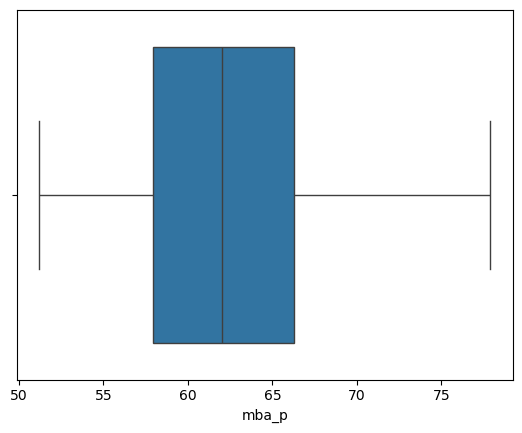

In [38]:
sns.boxplot(x=dados["mba_p"])
plt.show()

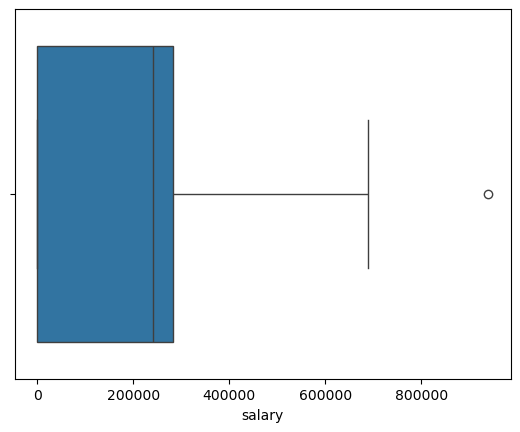

In [39]:
sns.boxplot(x=dados["salary"])
plt.show()

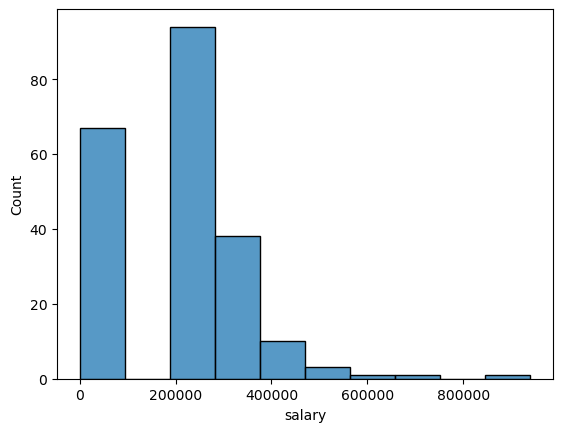

In [40]:
sns.histplot(data = dados, x="salary")
plt.show()

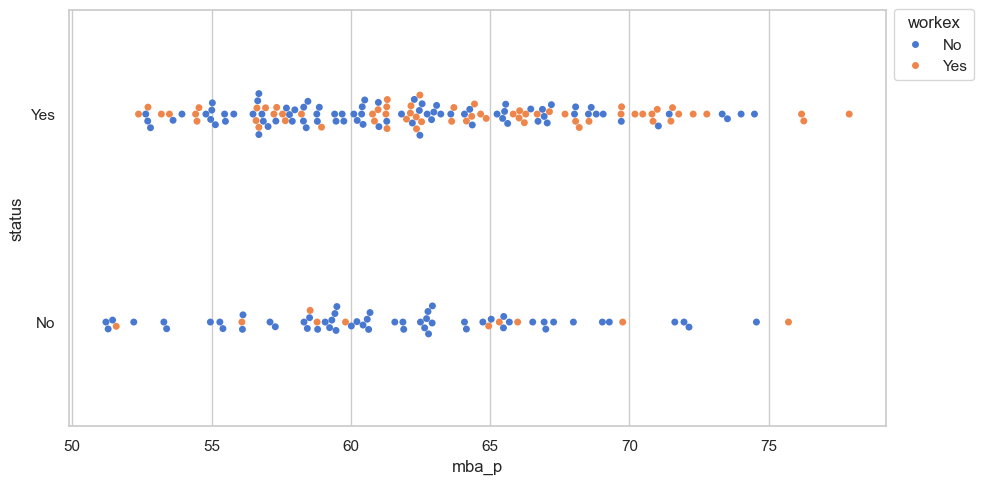

In [41]:
# Plotar grafico Swarmplot
sns.set_theme(style="whitegrid", palette="muted") # --> configurar tema

plt.figure(figsize=(10,5))
ax = sns.swarmplot(data=dados, x="mba_p", y="status", hue="workex") #--> hue é a separação dos dados
#ax.set(ylabel="mba_p")

plt.legend(title="workex", bbox_to_anchor=(1, 1.02), loc='upper left') # legenda fora
plt.tight_layout() 

plt.show()

In [42]:
# Plotar o grafico Violin da biblioteca plotly-express
px.violin(dados,y="salary",x="specialisation",color="gender",box=True,points="all")

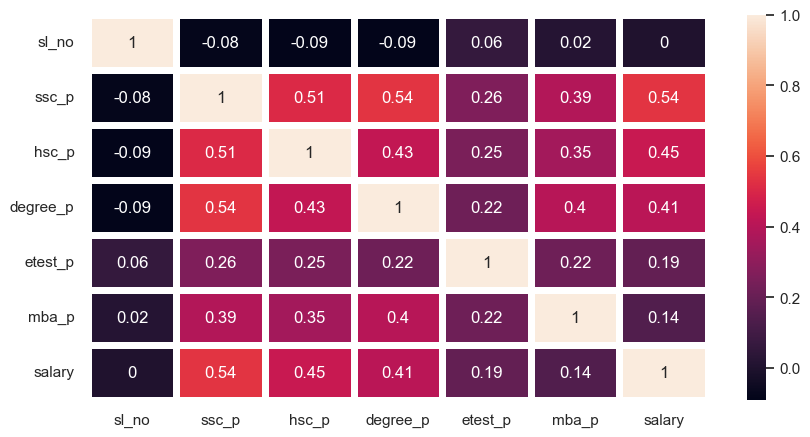

In [43]:
# Criar uma matriz de correlação
correlation_matriz = dados.select_dtypes(include=['number']).corr().round(2)

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(data = correlation_matriz, annot=True, linewidths=5, ax=ax)
plt.show()

In [44]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [45]:
# Transformar os dados categoricos
# LabelEncoder altera a coluna atual

colunas = ["gender", "workex", "specialisation", "status"]

Label_encoder = LabelEncoder()
for col in colunas:
    dados[col] = Label_encoder.fit_transform(dados[col])

dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [46]:
# One-Hot Encoding
dummy_hsc_s = pd.get_dummies(dados["hsc_s"], prefix="dummy")
dummy_degree_t = pd.get_dummies(dados["degree_t"], prefix="dummy")

dados_dummy = pd.concat([dados,dummy_hsc_s,dummy_degree_t], axis=1)

dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,...,0,57.80,1,250000.0,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,...,1,59.43,0,0.0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,...,0,55.50,1,425000.0,False,True,False,True,False,False


In [47]:
# Dropar tabelas 
dados_dummy.drop(["hsc_s","degree_t","salary"],axis=1,inplace=True)
dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


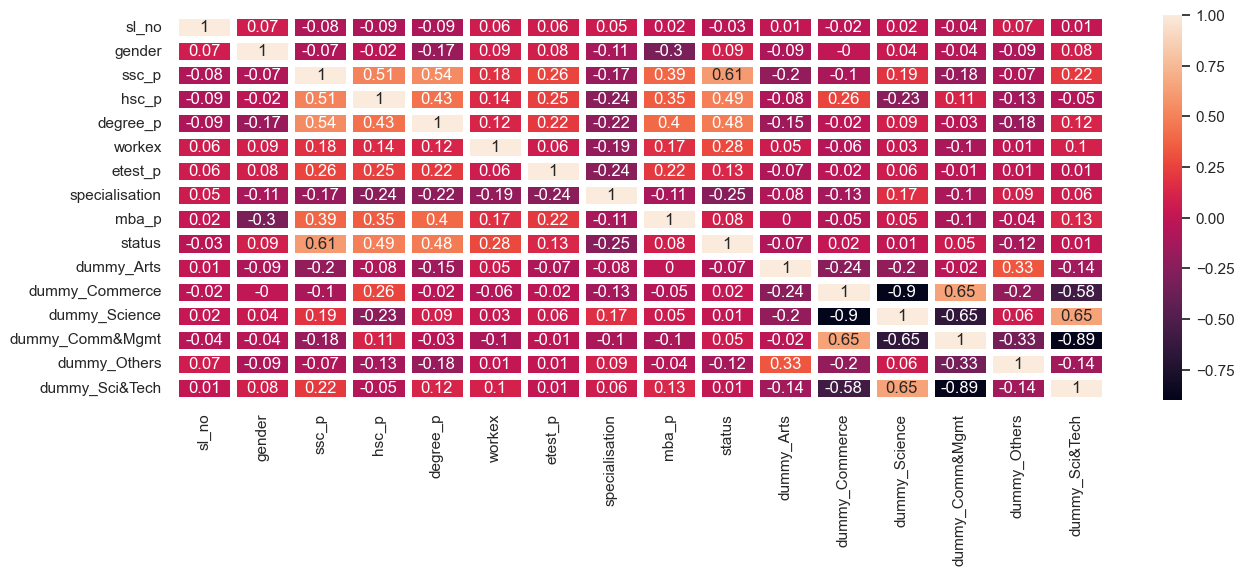

In [48]:
# Criar uma matriz de correlação
correlation_matriz = dados_dummy.select_dtypes(include=['number','boolean']).corr().round(2)

fig, ax = plt.subplots(figsize=(15,5))

sns.heatmap(data = correlation_matriz, annot=True, linewidths=5, ax=ax)
plt.show()

In [49]:
# Separar os dados 

x = dados_dummy[["ssc_p","hsc_p","degree_p","workex","mba_p"]]
y = dados_dummy["status"]

In [50]:
# Separar os dados em treino e teste 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=7)

In [51]:
x_train.shape

(172, 5)

In [52]:
x_test.shape

(43, 5)

In [53]:
# Verificar a escala dos dados
x.head()

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,0,59.43
4,85.80,73.60,73.30,0,55.50


In [54]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [55]:
x_train_escalonado

array([[-1.92672757, -0.66933853, -0.31559155, -0.70402569, -0.11827471],
       [ 0.26708378, -0.33015908, -0.72064899, -0.70402569,  1.18141841],
       [-0.89983715, -0.57243011,  0.76456162, -0.70402569, -1.50694011],
       [ 1.06059001,  0.97810451,  2.51981052, -0.70402569,  1.18665207],
       [-1.4599592 , -1.54151426, -0.72064899, -0.70402569, -0.6521084 ],
       [ 0.30349171,  0.58853269, -0.09956092, -0.70402569,  1.63500259],
       [ 0.50046796, -0.76624694, -1.39574473, -0.70402569, -1.67790646],
       [ 1.80741941, -0.08788804,  1.97973393,  1.42040271,  1.83562636],
       [-0.05965408, -0.28170487, -0.31559155, -0.70402569, -0.06768263],
       [-0.43306878, -0.37861329, -0.18057241, -0.70402569, -0.27354006],
       [-0.43306878,  0.00902037, -0.31559155, -0.70402569,  0.31786392],
       [-0.52642246, -0.54045034, -0.28723753, -0.70402569, -0.39042522],
       [-1.55331288, -2.12296474, -1.26072558, -0.70402569, -1.88550845],
       [-0.7131298 , -0.28170487, -1.3

In [56]:
# Definir o k do n_neighbors

error = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test_escalonado)
    error.append(np.mean(pred_i != y_test))

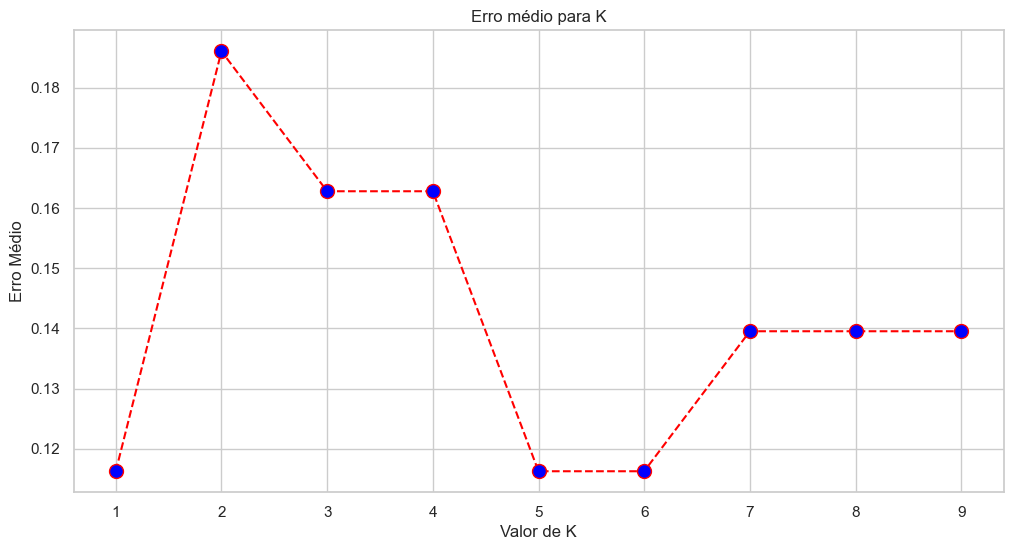

In [57]:
# Plotar o grafico --> Melhor K é o menor valor e sempre o valor impar

plt.figure(figsize=(12,6))
plt.plot(range(1,10), error, color = "red", linestyle = 'dashed', marker= "o", markerfacecolor="blue", markersize=10)
plt.title("Erro médio para K")
plt.xlabel("Valor de K")
plt.ylabel("Erro Médio")

plt.show()

In [59]:
# Treinar e prever o modelo - KNN

modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train)

y_predito = modelo_classificador.predict(x_test_escalonado)

y_predito

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [60]:
print(accuracy_score(y_test,y_predito))

0.8837209302325582


In [ ]:
# Usar o modelo svm

svm = Pipeline(

    [

        ("linear_svc",LinearSVC(C=1))

    ]

)

In [65]:
svm.fit(x_train_escalonado,y_train)

,steps,"[('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1
,multi_class,'ovr'
,fit_intercept,True


In [67]:
y_predito_svm = svm.predict(x_test_escalonado)

In [68]:
print(accuracy_score(y_test,y_predito_svm))

0.8604651162790697


In [71]:
accuracy_score_knn = accuracy_score(y_test,y_predito)
accuracy_score_svm = accuracy_score(y_test,y_predito_svm)

print("Resultado dos modelos")
print(f"Modelo KNN: {accuracy_score_knn* 100:.2f} %")
print(f"Modelo KNN: {accuracy_score_svm* 100:.2f} %")

Resultado dos modelos
Modelo KNN: 88.37 %
Modelo KNN: 86.05 %


#### Aula 3 - Kmeans

#### Aula 4 - Modelos Baseados em Árvores

#### Aula 5 - Validação Cruzada e Pipeline no Sklearn

#### Aula 6 - Classification Report e Métricas de Classificação

#### Aula 7 - AUC Score e ROC Curve